# **Operations to be done with google drive**

ImportError: cannot import name 'drive' from 'google' (unknown location)

# **Data Processing**

In [1]:
#@title Requirements

import tensorflow as tf
import os   

In [2]:
#@title Choosing Resources

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
   tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
#@title Data Cleansing

import cv2
import imghdr
from matplotlib import pyplot as plt

data_dir = ['Dataset_img']

image_exts = ['jpg', 'jpeg', 'png', 'bmp']

for i in data_dir:
    for image_class in os.listdir(i):
        for image in os.listdir(os.path.join(i, image_class)):
            image_path = os.path.join(i, image_class, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}'.format(image_path))

C:\Users\ADmin\AppData\Local\Temp\ipykernel_23324\4200232321.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


KeyboardInterrupt: 

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,         # Tái tổ hợp hình ảnh về khoảng giá trị [0, 1]
    rotation_range=5,      # Phạm vi xoay ảnh
    brightness_range = (0.7,1.2), # Phạm vi dịch chuyển theo chiều rộng
    horizontal_flip=True,   # Lật ngang ảnh
)

# Load dữ liệu từ thư mục
train_generator = datagen.flow_from_directory(
    'Dataset_img/train',
    target_size=(256, 256),
    batch_size=350,
    class_mode='binary')



Found 775 images belonging to 3 classes.


Found 216 files belonging to 3 classes.
Batch classes:  [2 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1 0 2 1 2 1 2 1 0 1 1 1 1 1 1]


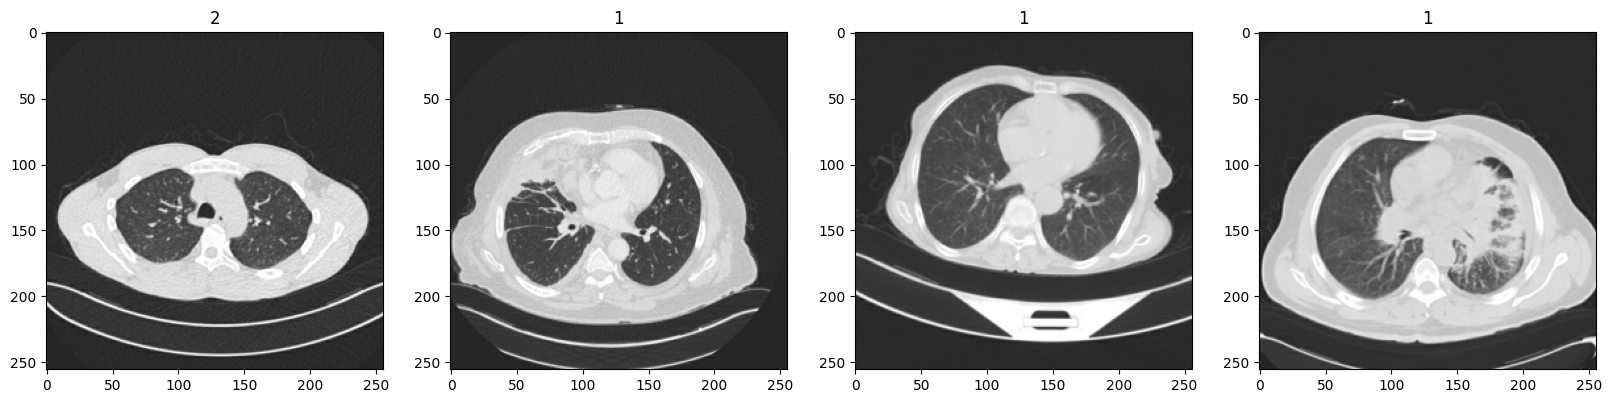

In [5]:
#@title Creating Data Pipeline
import numpy as np
from matplotlib import pyplot as plt

test = tf.keras.utils.image_dataset_from_directory('Dataset_img/test', shuffle=True)

test_iterator = test.as_numpy_iterator()
batch = test_iterator.next()
print("Batch classes: ", batch[1])
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Found 115 files belonging to 3 classes.


Batch classes:  [0 1 2 2 2 1 2 1 1 1 0 0 2 1 2 1 0 2 2 1 1 1 1 2 0 1 2 1 1 1 2 1]


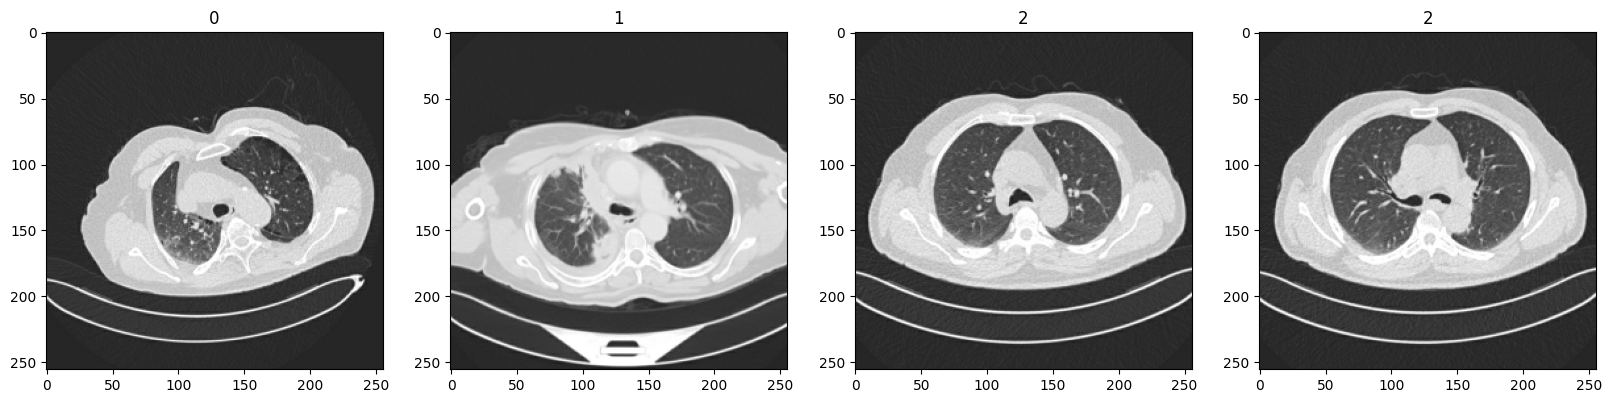

In [11]:
#@title Creating Data Pipeline
import numpy as np
from matplotlib import pyplot as plt

val = tf.keras.utils.image_dataset_from_directory('Dataset_img/val', shuffle=True)

val_iterator = val.as_numpy_iterator()
batch = val_iterator.next()
print("Batch classes: ", batch[1])
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Found 775 files belonging to 3 classes.
Batch classes:  [1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 2 2 2 1 2 1 2 2 2 1 1 1 1 2 2 1]


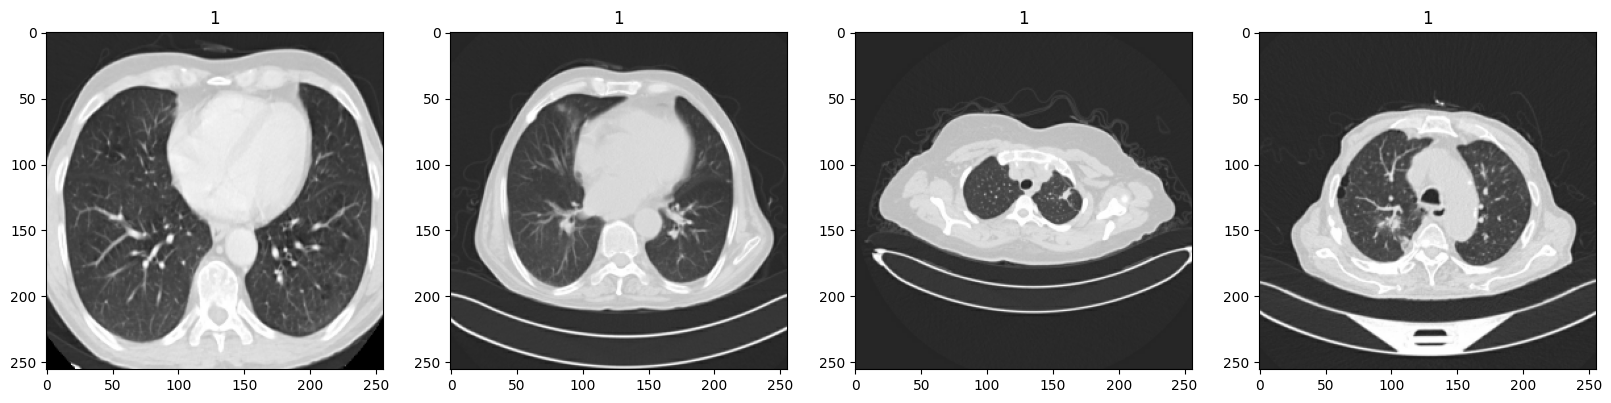

In [27]:
#@title Creating Data Pipeline
import numpy as np
from matplotlib import pyplot as plt

train = tf.keras.utils.image_dataset_from_directory('Dataset_img/train', shuffle=True)

train_iterator = train.as_numpy_iterator()
batch = train_iterator.next()
print("Batch classes: ", batch[1])
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [28]:
# #@title Preprocessing Data

''' Scaling Testing Data '''
# Scaling Data
test = test.map(lambda x,y: (x/255, y))
test.as_numpy_iterator().next()[0].max()

val = val.map(lambda x,y: (x/255, y))
val.as_numpy_iterator().next()[0].max()
train = train.map(lambda x,y: (x/255, y))
train.as_numpy_iterator().next()[0].max()

# ''' Splitting Data '''
# train_size = int(len(data)*.7)
# val_size = int(len(data)*.1)
# test_size = int(len(data)*.2)+1

# train = data.take(train_size)
# val = data.take(val_size)
# test = data.take(test_size)
# train_list = list(train)
# import numpy as np

# # Trích xuất và chuyển đổi dữ liệu từ MapDataset thành numpy arrays
# train_data = np.array([(image.numpy(), label.numpy()) for image, label in train])

# # Tách ảnh và nhãn thành các mảng riêng biệt
# train_images = np.array([item[0] for item in train_data])
# train_labels = np.array([item[1] for item in train_data])

# # Chuẩn bị Data Generator
# datagen = ImageDataGenerator(
#     rescale=1./255,  # Chuẩn hóa giá trị pixel về khoảng [0, 1]
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# # Chuẩn bị Dữ liệu cho Generator
# train_generator = datagen.flow(
#     x=train_images,  # Dữ liệu ảnh
#     y=train_labels,  # Nhãn tương ứng
#     batch_size=255,        # Kích thước batch
#     shuffle=True                  # Xáo trộn dữ liệu
# )


# print(train_size, "+", test_size, "+", val_size, "=", len(data))

1.0

# **Deep Learning Models Creation, Training, Evaluating, Saving, Performance Graph etc.**

In [9]:
#@title Deep Models XceptionNet, InceptionResnetV2, MobileNetV2

''' Deep Model '''
# The Network
import keras.backend as K
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten, Dropout, AveragePooling2D, Concatenate, GlobalAveragePooling2D, BatchNormalization, ReLU, Add, SeparableConv2D
from tensorflow.keras.applications import MobileNetV2, InceptionResNetV2, Xception


def xception(img_shape, n_classes):
    xceptionnet = Xception(input_shape=img_shape, include_top=False, weights='imagenet')
    xceptionnet.trainable = False

    input = Input(img_shape)
    x = xceptionnet(input, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate = 0.2)(x)

    output = Dense(n_classes, activation='softmax')(x)

    model = Model(input, output)
    return model





def inceptionresnetv2(img_shape, n_classes):
    inceptionresnet = InceptionResNetV2(input_shape=img_shape, include_top=False, weights='imagenet')
    inceptionresnet.trainable = False

    input = Input(img_shape)
    x = inceptionresnet(input, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate = 0.2)(x)

    output = Dense(n_classes, activation='softmax')(x)

    model = Model(input, output)
    return model







def mobilenetv2(img_shape, n_classes):
    mobilenet = MobileNetV2(input_shape=img_shape, include_top=False, weights='imagenet') # include_top: Một cờ chỉ định xem liệu bạn muốn bao gồm các lớp fully connected (hay "top") cho việc phân loại cuối cùng hay không. Trong trường hợp này, include_top=False cho biết rằng chúng ta không bao gồm các lớp fully connected.
    # 
    # weights: Có thể là None (không sử dụng trọng số được đào tạo trước), 'imagenet' (sử dụng trọng số được đào tạo trước trên tập dữ liệu ImageNet), hoặc đường dẫn đến file chứa trọng số.

    mobilenet.trainable = False
    # Việc đặt trainable thành False là phổ biến khi sử dụng các mô hình được đào tạo trước như MobileNetV2 như một bộ trích xuất đặc trưng trong một mô hình lớn hơn. Bằng cách này, chúng ta chỉ muốn sử dụng các trọng số được đào tạo trước mà không muốn cập nhật chúng trong quá trình huấn luyện mô hình toàn bộ. Điều này giúp tiết kiệm thời gian huấn luyện và giảm nguy cơ overfitting.
    input = Input(img_shape)
    x = mobilenet(input, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate = 0.2)(x)

    output = Dense(n_classes, activation='softmax')(x)

    model = Model(input, output)
    return model




input_shape = (256, 256, 3)
n_classes = 3

from keras.optimizers import SGD
opt = SGD(learning_rate=0.1)

model1 = xception(input_shape, n_classes)
model1.compile('Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()

model2 = inceptionresnetv2(input_shape, n_classes)
model2.compile('Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

model3 = mobilenetv2(input_shape, n_classes)
model3.compile('Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.summary()

# Trong hàm model1.compile() trong mã trên, Adam được sử dụng làm tối ưu hóa. Adam là một phương pháp tối ưu hóa gradient descent được sử dụng phổ biến trong học sâu. Đây là một thuật toán kết hợp giữa hai phương pháp tối ưu hóa: AdaGrad và RMSProp.

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 8, 8, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │         6,147 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,867,627 (79.60 MB)

 Trainable params: 6,147 (24.01 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_resnet_v2             │ (None, 6, 6, 1536)     │    54,336,736 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1536)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,611 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,341,347 (207.30 MB)

 Trainable params: 4,611 (18.01 KB)

 Non-trainable params: 54,336,736 (207.28 MB)

C:\Users\ADmin\AppData\Local\Temp\ipykernel_7848\1508608044.py:50: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNetV2(input_shape=img_shape, include_top=False, weights='imagenet') # include_top: Một cờ chỉ định xem liệu bạn muốn bao gồm các lớp fully connected (hay "top") cho việc phân loại cuối cùng hay không. Trong trường hợp này, include_top=False cho biết rằng chúng ta không bao gồm các lớp fully connected.


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
#@title Training the Models

# Train
logdir='logs'
tensorboard_callback1 = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist1 = model1.fit(train_generator,epochs=60, validation_data=val, callbacks=[tensorboard_callback1])
print(hist1.history)

tensorboard_callback2 = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist2 = model2.fit(train_generator, epochs=60, validation_data=val, callbacks=[tensorboard_callback2])
print(hist2.history)

tensorboard_callback3 = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist3 = model3.fit(train_generator, epochs=60, validation_data=val, callbacks=[tensorboard_callback3])
print(hist3.history)

Epoch 1/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 79s 32s/step - accuracy: 0.8305 - loss: 0.4544 - val_accuracy: 0.6696 - val_loss: 0.9298
Epoch 2/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 68s 26s/step - accuracy: 0.8405 - loss: 0.4256 - val_accuracy: 0.6783 - val_loss: 0.8606
Epoch 3/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 67s 26s/step - accuracy: 0.8536 - loss: 0.3645 - val_accuracy: 0.6870 - val_loss: 0.8837
Epoch 4/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 68s 18s/step - accuracy: 0.8610 - loss: 0.3858 - val_accuracy: 0.6870 - val_loss: 0.8846
Epoch 5/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 66s 17s/step - accuracy: 0.8743 - loss: 0.3601 - val_accuracy: 0.6870 - val_loss: 0.8777
Epoch 6/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 64s 17s/step - accuracy: 0.8945 - loss: 0.3406 - val_accuracy: 0.6783 - val_loss: 0.8874
Epoch 7/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 63s 17s/step - accuracy: 0.9001 - loss: 0.3414 - val_accuracy: 0.7043 - val_loss: 0.8891
Epoch 8/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 64s 25s/step - accuracy: 0.8948 - loss: 0.2750 - val_accuracy: 0.7304 - val_loss: 0.9164


7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8640 - loss: 0.5667
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7772 - loss: 0.6513
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 772ms/step - accuracy: 0.8159 - loss: 0.5205
Result1 : 
 0.8518518805503845 
Result2 : 
 0.7685185074806213 
Result3 : 
 0.8101851940155029
Loss1: 
 0.621716320514679 
Loss2: 
 0.6842618584632874 
Loss3: 
 0.5496758818626404
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Precision:0.8862559199333191, Recall:0.9739583134651184, Accuracy (Binary):0.519345223903656, Accuracy (sparse_categorical):[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
Confusion Matrix for Model 1: 
 [[ 0  0  1]
 [ 0 16  0]
 [ 0  0  7]]


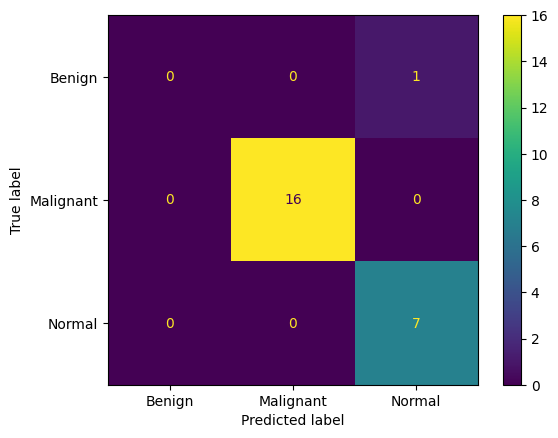

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Precision:0.886904776096344, Recall:0.7760416865348816, Accuracy (Binary):0.4255952537059784, Accuracy (sparse_categorical):[0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.]
Confusion Matrix for Model 2: 
 [[0 3 2]
 [0 7 3]
 [0 6 3]]


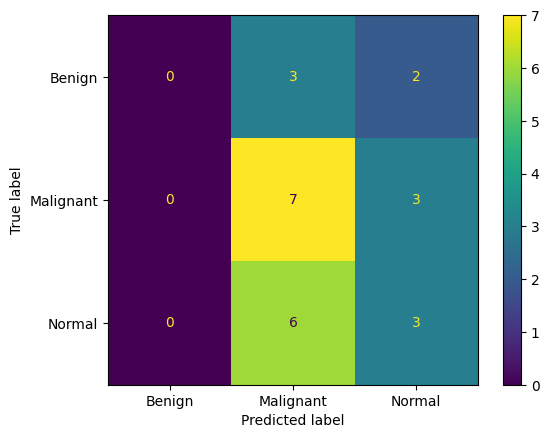

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Precision:0.8690476417541504, Recall:0.7604166865348816, Accuracy (Binary):0.3898809552192688, Accuracy (sparse_categorical):[1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.]
Confusion Matrix for Model 3: 
 [[ 0  2  1]
 [ 0 10  3]
 [ 0  4  4]]


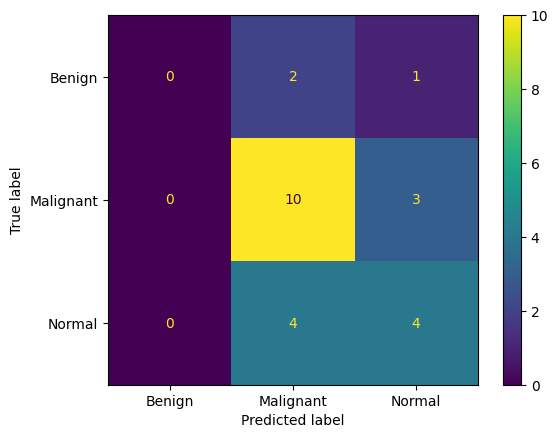

In [15]:
#@title Evaluating the Models

''' Evaluation '''
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, sparse_categorical_accuracy
from sklearn.metrics import *

loss1, results1 = model1.evaluate(test, batch_size=328, callbacks=[tensorboard_callback1])
loss2, results2 = model2.evaluate(test, batch_size=328, callbacks=[tensorboard_callback2])
loss3, results3 = model3.evaluate(test, batch_size=328, callbacks=[tensorboard_callback3])
print("Result1 : \n", results1, "\nResult2 : \n", results2, "\nResult3 : \n", results3)
print("Loss1: \n", loss1, "\nLoss2: \n", loss2, "\nLoss3: \n", loss3)

pre1 = Precision()
re1 = Recall()
acc1 = BinaryAccuracy()
for batch1 in test.as_numpy_iterator():
    X1, y1 = batch1
    yhat1 = model1.predict(X1)
    max = a = 0
    arr = np.ones(yhat1.shape[0])*-1
    for i in yhat1:
        if ((i[0] > i[1]) and (i[0] > i[2])):
            max = 0
        elif ((i[1] > i[0]) and (i[1] > i[2])):
            max = 1
        else:
            max = 2
        arr[a] = max
        a+=1
    pre1.update_state(y1, arr)
    re1.update_state(y1, arr)
    acc1.update_state(y1, arr)
acc11 = sparse_categorical_accuracy(y1, yhat1)
assert acc11.shape == (y1.shape[0],)
print(f'Precision:{pre1.result().numpy()}, Recall:{re1.result().numpy()}, Accuracy (Binary):{acc1.result().numpy()}, Accuracy (sparse_categorical):{acc11.numpy()}')
matrix = confusion_matrix(y1, arr)
print("Confusion Matrix for Model 1: \n", matrix)
display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Benign', 'Malignant', 'Normal'])
display.plot()
plt.show()

pre2 = Precision()
re2 = Recall()
acc2 = BinaryAccuracy()
for batch2 in test.as_numpy_iterator():
    X2, y2 = batch2
    yhat2 = model2.predict(X2)
    max = a = 0
    arr = np.ones(yhat2.shape[0])*-1
    for i in yhat1:
        if ((i[0] > i[1]) and (i[0] > i[2])):
            max = 0
        elif ((i[1] > i[0]) and (i[1] > i[2])):
            max = 1
        else:
            max = 2
        arr[a] = max
        a+=1
    pre2.update_state(y2, arr)
    re2.update_state(y2, arr)
    acc2.update_state(y2, arr)
acc21 = sparse_categorical_accuracy(y2, yhat2)
assert acc21.shape == (y2.shape[0],)
print(f'Precision:{pre2.result().numpy()}, Recall:{re2.result().numpy()}, Accuracy (Binary):{acc2.result().numpy()}, Accuracy (sparse_categorical):{acc21.numpy()}')
matrix = confusion_matrix(y2, arr)
print("Confusion Matrix for Model 2: \n", matrix)
display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Benign', 'Malignant', 'Normal'])
display.plot()
plt.show()

pre3 = Precision()
re3 = Recall()
acc3 = BinaryAccuracy()
for batch3 in test.as_numpy_iterator():
    X3, y3 = batch3
    yhat3 = model3.predict(X3)
    max = a = 0
    arr = np.ones(yhat3.shape[0])*-1
    for i in yhat1:
        if ((i[0] > i[1]) and (i[0] > i[2])):
            max = 0
        elif ((i[1] > i[0]) and (i[1] > i[2])):
            max = 1
        else:
            max = 2
        arr[a] = max
        a+=1
    pre3.update_state(y3, arr)
    re3.update_state(y3, arr)
    acc3.update_state(y3, arr)
acc31 = sparse_categorical_accuracy(y3, yhat3)
assert acc31.shape == (y3.shape[0],)
print(f'Precision:{pre3.result().numpy()}, Recall:{re3.result().numpy()}, Accuracy (Binary):{acc3.result().numpy()}, Accuracy (sparse_categorical):{acc31.numpy()}')
matrix = confusion_matrix(y3, arr)
print("Confusion Matrix for Model 3: \n", matrix)
display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Benign', 'Malignant', 'Normal'])
display.plot()
plt.show()

In [19]:
#@title Saving the Models and their Histories

import pickle


# Saving the Models

model1.save(os.path.join('models','imageclassifier1.keras'))
model2.save(os.path.join('models','imageclassifier2.keras'))
model3.save(os.path.join('models','imageclassifier3.keras'))


# Saving the Model Histories
logdir = 'logs'
with open(os.path.join(logdir+'/history1.pkl'), 'wb') as file:
    pickle.dump(hist1.history, file)

with open(os.path.join(logdir+'/history2.pkl'), 'wb') as file:
    pickle.dump(hist2.history, file)

with open(os.path.join(logdir+'/history3.pkl'), 'wb') as file:
    pickle.dump(hist3.history, file)

In [20]:
#@title Re-Loading the Models and their Histories

import pickle
from tensorflow.keras.models import load_model


logdir='logs'

# Loading the Models
model1 = load_model('models/imageclassifier1.keras')
model2 = load_model('models/imageclassifier2.keras')
model3 = load_model('models/imageclassifier3.keras')


# Loading the Model Histories

with open(os.path.join(logdir+'/history1.pkl'), 'rb') as file:
    hist1 = pickle.load(file)

with open(os.path.join(logdir+'/history2.pkl'), 'rb') as file:
    hist2 = pickle.load(file)

with open(os.path.join(logdir+'/history3.pkl'), 'rb') as file:
    hist3 = pickle.load(file)
     

c:\Users\ADmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 314 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


c:\Users\ADmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 982 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
c:\Users\ADmin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 318 variables whereas the saved optimizer has 6 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


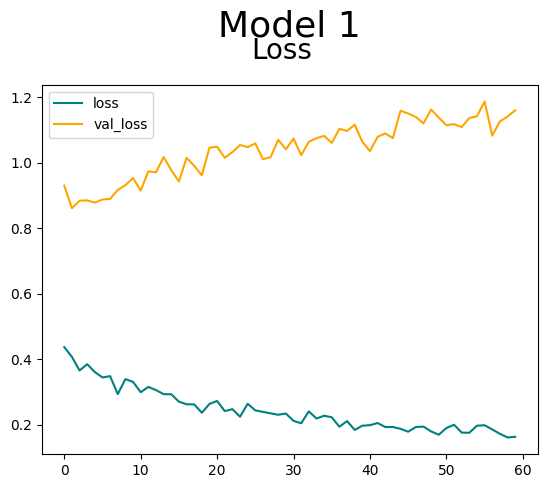

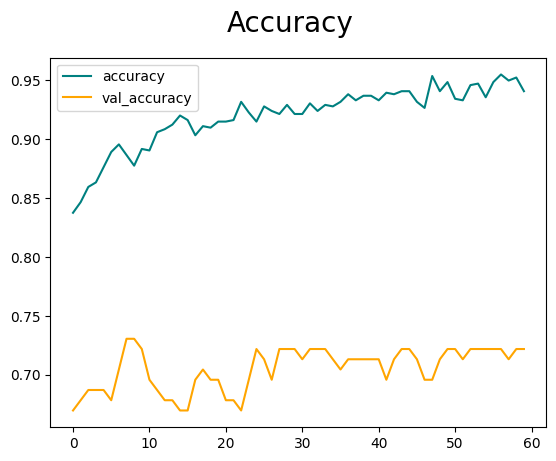

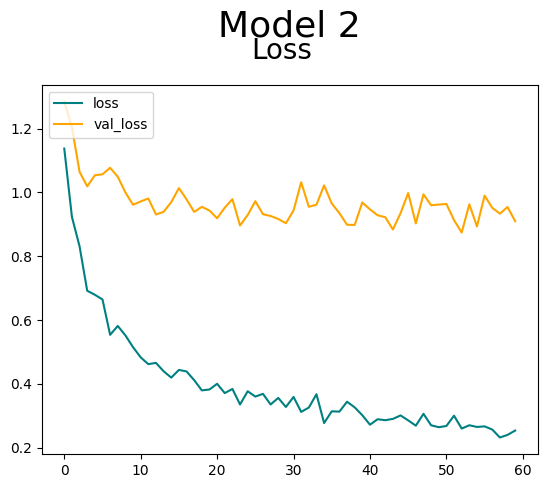

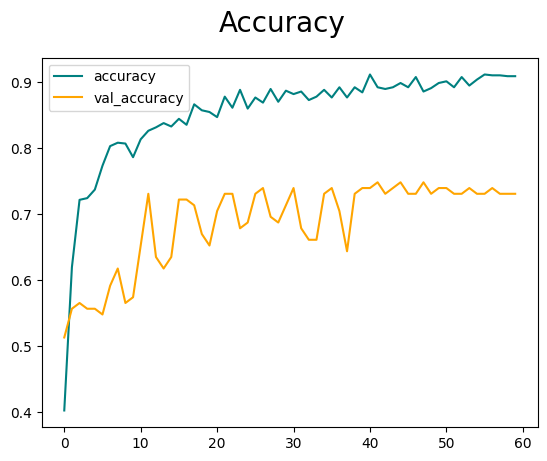

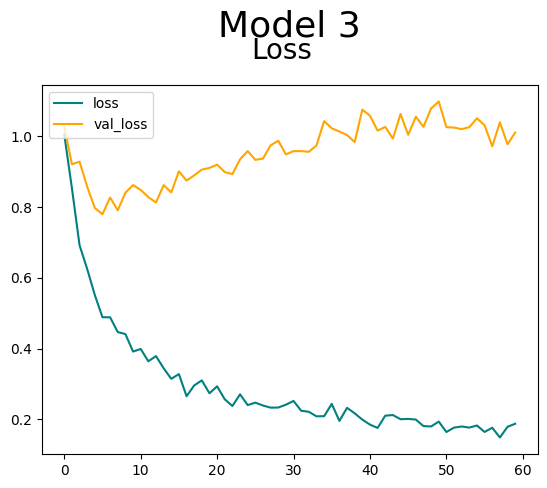

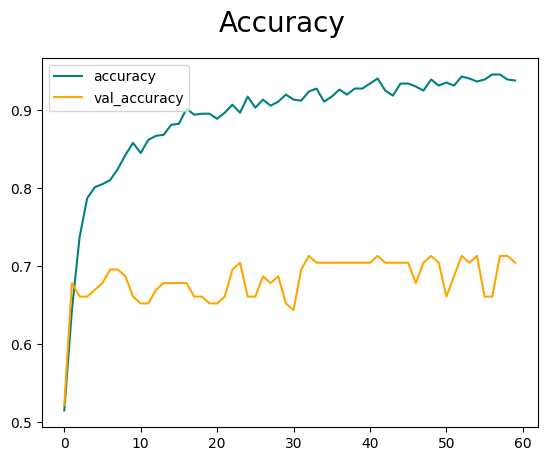

In [21]:
#@title Performance Graphs

import matplotlib.pyplot as plt

''' Model 1 '''
# Loss
fig = plt.figure()
plt.title("Model 1\n", loc='center', fontsize=26)
plt.plot(hist1['loss'], color='teal', label='loss')
plt.plot(hist1['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Accuracy
fig = plt.figure()
plt.plot(hist1['accuracy'], color='teal', label='accuracy')
plt.plot(hist1['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

''' Model 1 '''

# Loss
fig = plt.figure()
plt.title("Model 2\n", loc='center', fontsize=26)
plt.plot(hist2['loss'], color='teal', label='loss')
plt.plot(hist2['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Accuracy
fig = plt.figure()
plt.plot(hist2['accuracy'], color='teal', label='accuracy')
plt.plot(hist2['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# ''' Model 3 '''
# Loss
fig = plt.figure()
plt.title("Model 3\n", loc='center', fontsize=26)
plt.plot(hist3['loss'], color='teal', label='loss')
plt.plot(hist3['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Accuracy
fig = plt.figure()
plt.plot(hist3['accuracy'], color='teal', label='accuracy')
plt.plot(hist3['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Xception : 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 2 2 2 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0 1 2 2 0 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 0 2 2 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 2 2 0 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1

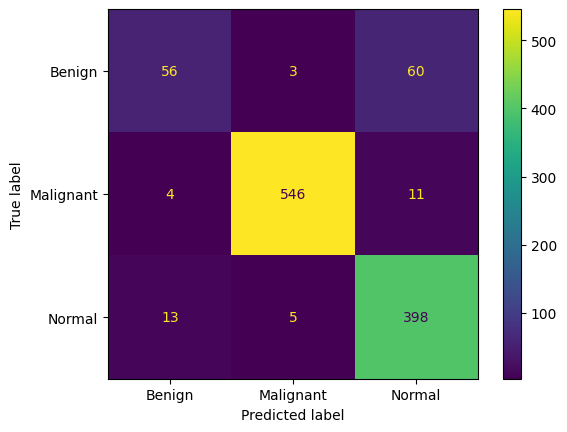

Precision:0.923828125, Recall:0.9682702422142029, Accuracy (Binary):0.5456204414367676
Confusion Matrix for Model 2: 
 [[ 41   7  71]
 [  4 554   3]
 [ 27  23 366]]


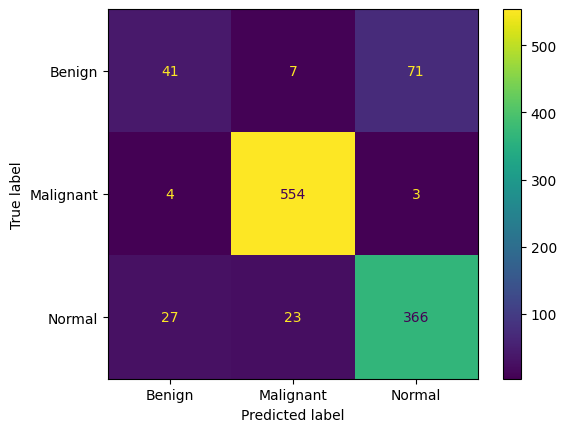

Precision:0.9455096125602722, Recall:0.9590583443641663, Accuracy (Binary):0.5666058659553528
Confusion Matrix for Model 3: 
 [[ 65   1  53]
 [  5 549   7]
 [ 35   4 377]]


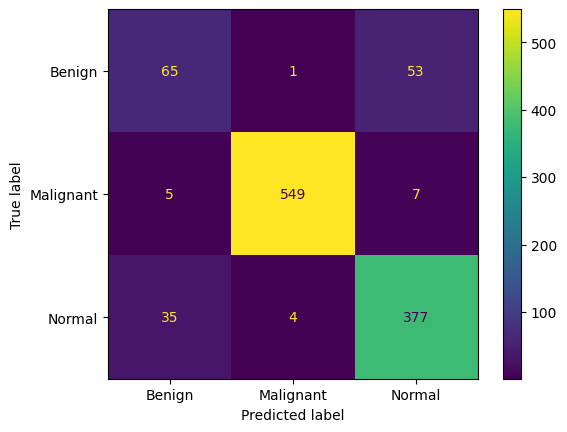

In [26]:
#@title Precision, Recall and Accuracy of the Models with respect to all images in dataset

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, sparse_categorical_accuracy
from sklearn.metrics import *
import cv2
labels = []; p1 = []; p2 = []; p3 = []
pre1 = Precision()
re1 = Recall()
data_dir = ['Dataset_img1']
acc1 = BinaryAccuracy()
for j in data_dir:
    for c, image_class in enumerate(os.listdir(j)):
        for image in os.listdir(os.path.join(j, image_class)):
            image_path = os.path.join(j, image_class, image)
            img = cv2.imread(image_path)
            resize = tf.image.resize(img, (256, 256))

            yhat1 = model1.predict(np.expand_dims(resize/255, 0), verbose=0)
            yhat2 = model2.predict(np.expand_dims(resize/255, 0), verbose=0)
            yhat3 = model3.predict(np.expand_dims(resize/255, 0), verbose=0)
            max = 0
            for i in yhat1:
                if ((i[0] > i[1]) and (i[0] > i[2])):
                    max = 0
                elif ((i[1] > i[0]) and (i[1] > i[2])):
                    max = 1
                else:
                    max = 2
                p1.append(max)

            max = 0
            for i in yhat2:
                if ((i[0] > i[1]) and (i[0] > i[2])):
                    max = 0
                elif ((i[1] > i[0]) and (i[1] > i[2])):
                    max = 1
                else:
                    max = 2
                p2.append(max)

            max = 0
            for i in yhat3:
                if ((i[0] > i[1]) and (i[0] > i[2])):
                    max = 0
                elif ((i[1] > i[0]) and (i[1] > i[2])):
                    max = 1
                else:
                    max = 2
                p3.append(max)

            labels.append(c)

labels = np.asarray(labels)
p1 = np.asarray(p1)
p2 = np.asarray(p2)
p3 = np.asarray(p3)

print("Xception : ", end="")
for i in p1:
    print(i, end=" ")
print("\nInceptionResNetV2 : ", end="")
for i in p2:
    print(i, end = " ")
print("\nMobileNetV2 : ", end="")
for i in p3:
    print(i, end=" ")
print()

pre1.update_state(labels, p1)
re1.update_state(labels, p1)
acc1.update_state(labels, p1)
print(f'Precision:{pre1.result().numpy()}, Recall:{re1.result().numpy()}, Accuracy (Binary):{acc1.result().numpy()}')
matrix = confusion_matrix(labels, p1)
print("Confusion Matrix for Model 1: \n", matrix)
display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Benign', 'Malignant', 'Normal'])
display.plot()
plt.show()

pre1 = Precision()
re1 = Recall()
acc1 = BinaryAccuracy()
pre1.update_state(labels, p2)
re1.update_state(labels, p2)
acc1.update_state(labels, p2)
print(f'Precision:{pre1.result().numpy()}, Recall:{re1.result().numpy()}, Accuracy (Binary):{acc1.result().numpy()}')
matrix = confusion_matrix(labels, p2)
print("Confusion Matrix for Model 2: \n", matrix)
display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Benign', 'Malignant', 'Normal'])
display.plot()
plt.show()

pre1 = Precision()
re1 = Recall()
acc1 = BinaryAccuracy()
pre1.update_state(labels, p3)
re1.update_state(labels, p3)
acc1.update_state(labels, p3)
print(f'Precision:{pre1.result().numpy()}, Recall:{re1.result().numpy()}, Accuracy (Binary):{acc1.result().numpy()}')
matrix = confusion_matrix(labels, p3)
print("Confusion Matrix for Model 3: \n", matrix)
display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Benign', 'Malignant', 'Normal'])
display.plot()
plt.show()

# **Predictions by each model and Probability Extraction for Fuzzy Ensemble of Deep Neural Networks**

In [29]:
#@title Predictions of each Model and Probability Extraction from Models

# Getting Probability Distribution
data_dir = ['Dataset_img1']
print("\nGetting the Probability Distribution")
loss1, results1 = model1.evaluate(test, batch_size=328, callbacks=[tensorboard_callback1])
loss2, results2 = model2.evaluate(test, batch_size=328, callbacks=[tensorboard_callback2])
loss3, results3 = model3.evaluate(test, batch_size=328, callbacks=[tensorboard_callback3])
print("Result1 : \n", results1, "\nResult2 : \n", results2, "\nResult3 : \n", results3)
print("Loss1: \n", loss1, "\nLoss2: \n", loss2, "\nLoss3: \n", loss3)

predictions11 = model1.predict(test, batch_size=328, callbacks=[tensorboard_callback1])
predictions21 = model2.predict(test, batch_size=328, callbacks=[tensorboard_callback2])
predictions31 = model3.predict(test, batch_size=328, callbacks=[tensorboard_callback3])

predictions1 = model1.predict(train)
prediction_classes = [1 if ((prob[1] > prob[0]) and (prob[1] > prob[2])) else 2 if ((prob[2] > prob[0]) and (prob[2] > prob[1])) else 0 for prob in predictions1]
print(np.ravel(predictions1))
print("Model 1 : \n", prediction_classes)

predictions2 = model2.predict(train)
prediction_classes = [1 if ((prob[1] > prob[0]) and (prob[1] > prob[2])) else 2 if ((prob[2] > prob[0]) and (prob[2] > prob[1])) else 0 for prob in predictions2]
print("Model 2 : \n", prediction_classes)

predictions3 = model3.predict(train)
prediction_classes = [1 if ((prob[1] > prob[0]) and (prob[1] > prob[2])) else 2 if ((prob[2] > prob[0]) and (prob[2] > prob[1])) else 0 for prob in predictions3]
print("Model 3 : \n", prediction_classes)


p1 = []
p2 = []
p3 = []
for i in data_dir:
    for image_class in os.listdir(i):
        for image in os.listdir(os.path.join(i, image_class)):
            image_path = os.path.join(i, image_class, image)
            img = cv2.imread(image_path)
            resize = tf.image.resize(img, (256, 256))

            yhat1 = model1.predict(np.expand_dims(resize/255, 0))
            yhat2 = model2.predict(np.expand_dims(resize/255, 0))
            yhat3 = model3.predict(np.expand_dims(resize/255, 0))

            p1.append(yhat1[0])
            p2.append(yhat2[0])
            p3.append(yhat3[0])

p1 = np.array(p1)
p2 = np.array(p2)
p3 = np.array(p3)

import csv
fp = open("csv/xceptionnet.csv",'w+',newline = '')
writer = csv.writer(fp)
for i in p1:
    writer.writerow([i[0], i[1], i[2]])
fp.close()

fp = open("csv/inceptionresnet.csv",'w+',newline = '')
writer = csv.writer(fp)
for i in p2:
    writer.writerow([i[0], i[1], i[2]])
fp.close()

fp = open("csv/mobilenetv2.csv",'w+',newline = '')
writer = csv.writer(fp)
for i in p3:
    writer.writerow([i[0], i[1], i[2]])
fp.close()


Getting the Probability Distribution
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.1359 - loss: 1.2574
7/7 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.5245 - loss: 1.0793
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 696ms/step - accuracy: 0.3576 - loss: 5.2728
Result1 : 
 0.1111111119389534 
Result2 : 
 0.5138888955116272 
Result3 : 
 0.375
Loss1: 
 1.2918206453323364 
Loss2: 
 1.0892490148544312 
Loss3: 
 5.128668785095215
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 876ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step
[0.02419376 0.956671   0.01913519 ... 0.01604095 0.97086114 0.01309797]
Model 1 : 
 [1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 0, 1

In [30]:
import cv2
import numpy as np
import tensorflow as tf

p1 = []
p3 = []

for i in data_dir:
    for image_class in os.listdir(i):
        for image in os.listdir(os.path.join(i, image_class)):
            image_path = os.path.join(i, image_class, image)
            img = cv2.imread(image_path)
            resize = tf.image.resize(img, (256, 256))  # Sử dụng cv2.resize() thay vì tf.image.resize()

            yhat1 = model1.predict(np.expand_dims(resize/255, 0))
            # yhat2 = model2.predict(np.expand_dims(resize/255, 0))
            yhat3 = model3.predict(np.expand_dims(resize/255, 0))

            p1.append(yhat1[0])
            # p2.append(yhat2[0])
            p3.append(yhat3[0])

p1 = np.array(p1)
# p2 = np.array(p2)
p3 = np.array(p3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1

In [31]:
#@title ROC-AUC Curves

import pandas as pd
import numpy as np
from sklearn.metrics import *
import math, os
from sklearn.preprocessing import label_binarize

#ROC-AUC
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
def plot_roc(val_label,decision_val, caption='ROC Curve'):
    num_classes=np.unique(val_label).shape[0]
    classes = []
    for i in range(num_classes):
        classes.append(i)
    plt.figure()
    decision_val = label_binarize(decision_val, classes=classes)

    if num_classes!=2:
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(num_classes):
            y_val = label_binarize(val_label, classes=classes)
            fpr[i], tpr[i], _ = roc_curve(y_val[:, i], decision_val[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        for i in range(num_classes):
            plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                           ''.format(i+1, roc_auc[i]))
    else:
        fpr,tpr,_ = roc_curve(val_label,decision_val, pos_label=1)
        roc_auc = auc(fpr,tpr)*100
        plt.plot(fpr,tpr,label='ROC curve (AUC=%0.2f)'%roc_auc)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(caption)
    plt.legend(loc="lower right")
    plt.savefig(str(len(classes))+'.png',dpi=300)

def predicting(ensemble_prob):
    prediction = np.zeros((ensemble_prob.shape[0],))
    for i in range(ensemble_prob.shape[0]):
        temp = ensemble_prob[i]
        t = np.where(temp == np.max(temp))[0][0]
        prediction[i] = t
    return prediction

def metrics(labels, predictions,classes):
    print("Classification Report:")
    print("Labels : ",labels.shape, '\nPredictions : ', predictions.shape)
    print(classification_report(labels, predictions, target_names = classes, digits = 4))
    matrix = confusion_matrix(labels, predictions)
    print("Confusion matrix:")
    print(matrix)
    display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Benign', 'Malignant', 'Normal'])
    display.plot()
    plt.show()
    print("\nClasswise Accuracy :{}".format(matrix.diagonal()/matrix.sum(axis = 1)))
    print("\nBalanced Accuracy Score: ",balanced_accuracy_score(labels,predictions))

## ***Fuzzy Ensemble using Mitcherlich Function***

2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 0 0 0 2 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 0 2 2 0 0 0 0 2 2 2 0 2 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 2 2 0 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

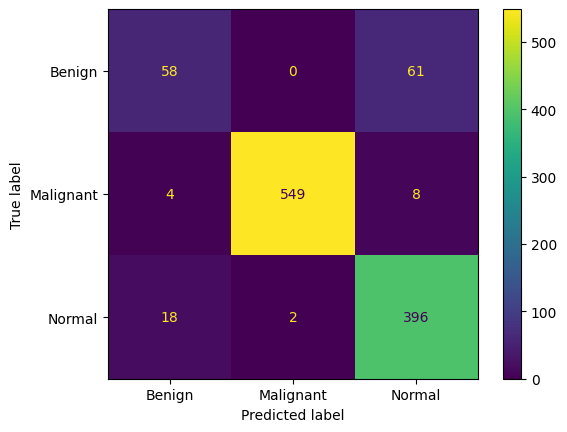


Classwise Accuracy :[0.48739496 0.97860963 0.95192308]

Balanced Accuracy Score:  0.8059758868582397
Accuracy[0.9151] Precision[0.8577] Recall[0.8060] F1[0.8231] ]
________________________________________________________________


Overall Accuracy[0.9151] Overall Precision[0.8577] Overall Recall[0.8060] Overall F1[0.8231]


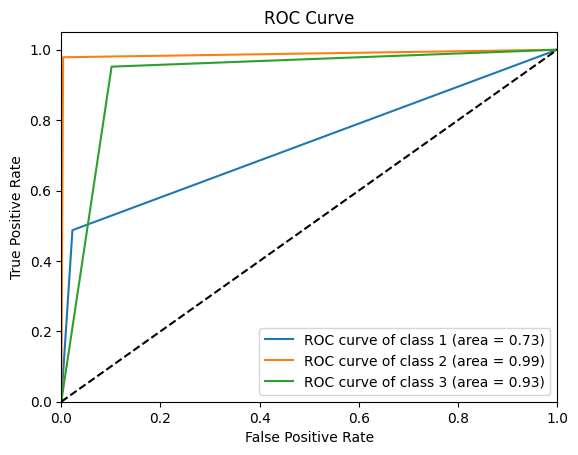

In [32]:
#@title Predictions with Mitcherlich Function

import pandas as pd
import math
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def fuzzy_rank(CF, top):
    R_L = np.zeros(CF.shape)
    for i in range(CF.shape[0]):
        for j in range(CF.shape[1]):
            for k in range(CF.shape[2]):
                R_L[i][j][k] = (2 - 1 * 2 ** CF[i][j][k])

    K_L = 1*np.ones(shape = R_L.shape)
    for i in range(R_L.shape[0]):
        for sample in range(R_L.shape[1]):
            for k in range(top-1):
                a = R_L[i][sample]
                idx = np.where(a==np.partition(a, k)[k])
                K_L[i][sample][idx] = R_L[i][sample][idx]

    return K_L

def CFS_func(CF, K_L):
    H = CF.shape[0]
    for f in range(CF.shape[0]):
        for i in range(CF.shape[1]):
            idx = np.where(K_L[f][i] == 1)
            CF[f][i][idx] = 0
    CFS = 1 - np.sum(CF,axis=0)/H
    return CFS

def Mitcherlich(top = 2, *argv):
    L = 0
    for arg in argv:
        L += 1

    num_classes = arg.shape[1]
    CF = np.zeros(shape = (L,arg.shape[0], arg.shape[1]))

    for i, arg in enumerate(argv):
        CF[:][:][i] = arg

    R_L = fuzzy_rank(CF, top)

    RS = np.sum(R_L, axis=0)
    CFS = CFS_func(CF, R_L)
    FS = RS*CFS


    predictions = np.argmin(FS,axis=1)
    return predictions

def getfile(filename):
    root='csv/'
    file = root+filename
    if '.csv' not in filename:
        file = file+'.csv'
    df = pd.read_csv(file,header=None)
    df = np.asarray(df)

    labels=[]
    for k in data_dir:
        for i, c in enumerate(os.listdir(k)):
            for j in range(len(os.listdir(k+"/"+c))):
                labels.append(i)
    labels = np.asarray(labels)
    return df,labels

p1,labels = getfile("xceptionnet")
# p2,_ = getfile("inceptionresnet")
p3,_ = getfile("mobilenetv2")

predictions = Mitcherlich(3, p1, p3)
for i in predictions:
    print(i, end=" ")
print()

correct = np.where(predictions == labels)[0].shape[0]
total = labels.shape[0]

classes = []
for i in range(p1.shape[1]):
    classes.append(str(i+1))
print(classes)

metrics(labels, predictions, classes)

plot_roc(labels,predictions)


avg_acc_list = []
avg_precision_list = []
avg_recall_list = []
avg_f1_list = []

acc_fold = accuracy_score(labels, predictions)
avg_acc_list.append(acc_fold)
precision_fold = precision_score(labels, predictions, average='macro')
avg_precision_list.append(precision_fold)
recall_fold = recall_score(labels, predictions, average='macro')
avg_recall_list.append(recall_fold)
f1_fold  = f1_score(labels, predictions, average='macro')
avg_f1_list.append(f1_fold)

print('Accuracy[{:.4f}] Precision[{:.4f}] Recall[{:.4f}] F1[{:.4f}] ]'.format(acc_fold, precision_fold, recall_fold, f1_fold ))
print('________________________________________________________________')

avg_acc = np.asarray(avg_acc_list)
avg_precision = np.asarray(avg_precision_list)
avg_recall = np.asarray(avg_recall_list)
avg_f1 = np.asarray(avg_f1_list)
print("\n")
print('Overall Accuracy[{:.4f}] Overall Precision[{:.4f}] Overall Recall[{:.4f}] Overall F1[{:.4f}]'.format(np.mean(avg_acc), np.mean(avg_precision), np.mean(avg_recall), np.mean(avg_f1)))